<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/Apprendimento_classificatore_Bayesiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addestramento di un classificatrore Bayesiano

In questo notebook andremo ad addestrare un o più classificatori Bayesiani cercando di effettuari quanti più esperimenti possibili per creare una baseline del problema che stiamo affrontando e cercare di tirare fuori un modello capace di battere il nostro attuale lower bound rappresentato dallo stimatore moda.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()


In [4]:
df = pd.read_csv('HCV_ImputerMean.csv', delimiter=',')
print(df)

      Age   Gender   BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     56.0     1.0  35.0    2.0             1.0        1.0        1.0   
1     46.0     1.0  29.0    1.0             2.0        2.0        1.0   
2     57.0     1.0  33.0    2.0             2.0        2.0        2.0   
3     49.0     2.0  33.0    1.0             2.0        1.0        2.0   
4     59.0     1.0  32.0    1.0             1.0        2.0        1.0   
...    ...     ...   ...    ...             ...        ...        ...   
1380  44.0     1.0  29.0    1.0             2.0        2.0        2.0   
1381  55.0     1.0  34.0    1.0             2.0        2.0        1.0   
1382  42.0     1.0  26.0    2.0             2.0        1.0        1.0   
1383  52.0     1.0  29.0    2.0             1.0        1.0        2.0   
1384  55.0     2.0  26.0    1.0             2.0        2.0        2.0   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                  2.0        2

In [ ]:
df_reduced = pd.read_csv('pca_reduced_df_uncleaned.csv', delimiter=',')
print(df_reduced)

## Gaussian Naive Bayes

Primo esperimento addestramento Gaussian Naive Bayes su il dataframe di partenza uncleaned con approccio classico con una cross-validation a 10 folds.

In [5]:
# inizio dell'addestramento con Gaussina Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# preparazione del data set diviso infeature e target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# istanziazione del modello Gaussian Naive Bayes
model_GB = GaussianNB()

# usiamo la cross-val
scores = cross_val_score(model_GB, X, y, cv=10)
mean_accurancy = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy)


Accurancy su ogni ciclo della cross-validation: [0.25179856 0.26618705 0.23741007 0.24460432 0.25899281 0.25362319
 0.22463768 0.32608696 0.21014493 0.2826087 ]
Accurancy mediata su i 10 fold fatti: 0.25560942550307575


Definiamo una funzione che ci permetta di effettuare una valutazione più completa del nostro modello.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, fbeta_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

# funzione per il calcolo di una batterie di metriche di valutazione
def full_evaluate_multiclass(classifier, X, y):
    """
    Esegue una cross-validation con 10 fold per un classificatore multi-classe e calcola le metriche di valutazione.

    Parameters:
    classifier: Classificatore multi-classe.
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.

    Returns:
    None.
    """
    # Esegue la cross-validation con 10 fold
    scores = cross_val_score(classifier, X, y, cv=10)

    # Calcola le metriche di valutazione
    y_pred = cross_val_predict(classifier, X, y, cv=10)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    precision_macro = precision_score(y, y_pred, average='macro')
    precision_micro = precision_score(y, y_pred, average='micro')
    recall_macro = recall_score(y, y_pred, average='macro')
    recall_micro = recall_score(y, y_pred, average='micro')
    f1_macro = f1_score(y, y_pred, average='macro')
    f1_micro = f1_score(y, y_pred, average='micro')
    f2_micro = fbeta_score(y, y_pred, beta=2, average='micro')
    f2_macro = fbeta_score(y, y_pred, beta=2, average='macro')
    f2_weighted = fbeta_score(y, y_pred, beta=2, average='weighted')
    conf_matrix = confusion_matrix(y, y_pred)

    # Stampa le metriche di valutazione
    print("Accuracy:", scores.mean())
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Precision (Macro):", precision_macro)
    print("Precision (Micro):", precision_micro)
    print("Recall (Macro):", recall_macro)
    print("Recall (Micro):", recall_micro)
    print("F1-score (Macro):", f1_macro)
    print("F1-score (Micro):", f1_micro)
    print("F2-score (Micro):", f2_micro)
    print("F2-score (Macro):", f2_macro)
    print("F2-score (Weighted):", f2_weighted)
    print("Confusion matrix:\n", conf_matrix)

Andiamo a effettuare una valutazione complerta con più metriche per il calassificatore

In [34]:
# istanziazione del modello Gaussian Naive Bayes
model_GB2 = GaussianNB()

# effettuiamo la valutazione completa
full_evaluate_multiclass(model_GB2, X, y)


Accuracy: 0.25560942550307575
Precision: 0.24777553501708366
Recall: 0.2555956678700361
F1-score: 0.2463700299040024
Precision (Macro): 0.24703757235351245
Precision (Micro): 0.2555956678700361
Recall (Macro): 0.2525191686574661
Recall (Micro): 0.2555956678700361
F1-score (Macro): 0.24457732641257876
F1-score (Micro): 0.2555956678700361
F2-score (Micro): 0.2555956678700361
F2-score (Macro): 0.24785603012197244
F2-score (Weighted): 0.2503754072791496
Confusion matrix:
 [[ 55  72  83 126]
 [ 62  65  79 126]
 [ 77  69  77 132]
 [ 61  63  81 157]]


Andiamo a definire una funzione che ci permetta di valutare la roc_auc_score e in seguito andare a rappresentare il risultati tramite un grafico.

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# funzione per il calcolo della Roc_AUC_score
def evaluate_roc_auc(classifier, X, y):
    """
    Calcola la metrica roc_auc_score e plotta la curva ROC multi-classe per un classificatore multi-classe.

    Parameters:
    classifier: Classificatore multi-classe.
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.

    Returns:
    None.
    """
    # Esegue la cross-validation con 10 fold
    y_pred = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

    # Calcola la metrica roc_auc_score
    y_bin = label_binarize(y, classes=np.unique(y))
    roc_auc_score_macro = roc_auc_score(y_bin, y_pred, average='macro')

    # Calcola la curva ROC multi-classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_bin.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcola la media delle aree sotto la curva ROC per ogni classe
    roc_auc_score_micro = np.mean(list(roc_auc.values()))

    # Plotta la curva ROC multi-classe
    plt.figure()
    lw = 2
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Stampa la metrica roc_auc_score
    print("ROC AUC Score (macro):", roc_auc_score_macro)
    print("ROC AUC Score (micro):", roc_auc_score_micro)


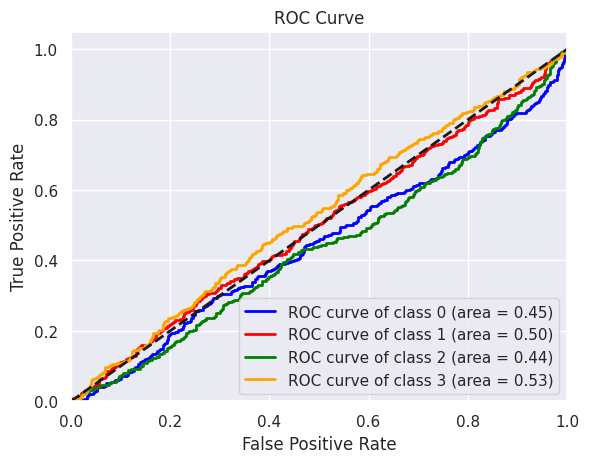

ROC AUC Score (macro): 0.47922093486620587
ROC AUC Score (micro): 0.47922093486620587


In [36]:
# istanziazione del modello Gaussian Naive Bayes
model_GB3 = GaussianNB()

evaluate_roc_auc(model_GB3, X, y)

Andiamo a cercare il miglior valore di fold per la cross validation e iniziamo facendoci un idea dei principali fold utilizzati in letteratura.

In [37]:
# creiamo questa funzione di addestramento per automatizzare i nostri esperimenti
def evaluate_classifiers(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("----------")


In [56]:
values = [5, 10, 15, 20]
classifier_model = [GaussianNB]

evaluate_classifiers(values, classifier_model, X, y)

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 5
Mean Accuracy: 0.244043321299639
Scores: [0.23465704 0.22382671 0.23104693 0.26714801 0.26353791]
----------
CV: 10
Mean Accuracy: 0.25560942550307575
Scores: [0.25179856 0.26618705 0.23741007 0.24460432 0.25899281 0.25362319
 0.22463768 0.32608696 0.21014493 0.2826087 ]
----------
CV: 15
Mean Accuracy: 0.25557113916160196
Scores: [0.31182796 0.21505376 0.25806452 0.24731183 0.27956989 0.23913043
 0.26086957 0.22826087 0.23913043 0.20652174 0.33695652 0.2826087
 0.23913043 0.22826087 0.26086957]
----------
CV: 20
Mean Accuracy: 0.2656418219461698
Scores: [0.32857143 0.3        0.27142857 0.27142857 0.24285714 0.26086957
 0.31884058 0.2173913  0.20289855 0.20289855 0.23188406 0.24637681
 0.23188406 0.23188406 0.4057971  0.28985507 0.2173913  0.23188406
 0.30434783 0.30434783]
----------


In [39]:
# funzione per lo studio dell'ottimizzazione del numero k usato per i fold della cross-val
def evaluate_classifiers_with_plot(cv_values, classifiers, X, y, step):
    for classifier in classifiers:
        print("Classifier:", classifier)
        mean_accuracies_list = []
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            mean_accuracies_list.append(mean_accuracy)
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("----------")

        # Plotting the mean accuracies
        cv_range = np.array(cv_values)
        plt.plot(cv_range, mean_accuracies_list)
        plt.xticks(np.arange(0, max(cv_range) + 1, step))
        plt.xlabel('Number of folds (cv)')
        plt.ylabel('Mean Accuracy')
        plt.title('Cross-Validation Mean Accuracy')
        plt.show()

Proviamo a generare dei plot sul comportamente del parametro scelto per effettuare i fold della cross-validation e andiamo ad eseguire una serie di prove per capire quale sia il miglior k.

In [ ]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,31) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_model, X, y)

Gli esperimenti condotti purtoppo si dichiarano ad oggi un fallimento sull'addestramento, di seguito proveremo a ripetere gli stessi passi di addestramento fatti precedentemente, ma sul dataset ridotto di dimensionalità con la tecnica della PCA usata anche negli esperimenti condotti sul decision tree.

### Addestramento del Gassian Naive Bayes sul data set ridotto con tecnica PCA

In [55]:
# preparazione degli attributi che faranno da predittori e del target
X_pca = df_reduced.drop('Baselinehistological staging', axis=1)
y_pca = df_reduced['Baselinehistological staging']

# istanziazione del modello Gaussian Naive Bayes
model_GB2 = GaussianNB()

# usiamo la cross-val
scores2 = cross_val_score(model_GB2, X_pca, y_pca, cv=10)
mean_accurancy2 = scores2.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores2)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy2)

NameError: ignored

Anche in questo caso i risultati non lasciano sperare in bene ma procediamo nella verifica

In [54]:
# primo tentativo con i classici valori di cross-val utilizzati in letteratura
values2 = [5, 10, 15, 20]
classifier_model2 = [GaussianNB]

evaluate_classifiers(values2, classifier_model2, X_pca, y_pca)

NameError: ignored

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 2
Mean Accuracy: 0.2469357071958228
Scores: [0.24098124 0.25289017]
----------
CV: 3
Mean Accuracy: 0.23468023901863377
Scores: [0.2034632  0.23376623 0.26681128]
----------
CV: 4
Mean Accuracy: 0.23902025620096282
Scores: [0.19596542 0.23988439 0.23699422 0.28323699]
----------
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.18411552 0.24187726 0.24548736 0.25270758 0.26714801]
----------
CV: 6
Mean Accuracy: 0.24117886943973899
Scores: [0.19480519 0.19480519 0.23809524 0.22510823 0.32034632 0.27391304]
----------
CV: 7
Mean Accuracy: 0.23538869477955773
Scores: [0.20707071 0.21212121 0.24242424 0.22727273 0.22727273 0.28282828
 0.24873096]
----------
CV: 8
Mean Accuracy: 0.2419108364892698
Scores: [0.1954023  0.21965318 0.24855491 0.23121387 0.24855491 0.27745665
 0.28901734 0.22543353]
----------
CV: 9
Mean Accuracy: 0.23395486140584185
Scores: [0.2012987  0.19480519 0.20779221 0.23376623 0.24675325 0.18831169
 0.32467532 

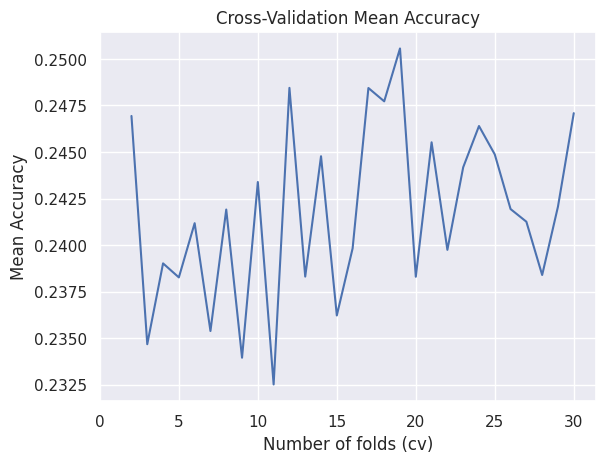

In [ ]:
# ottimizzazione della cross-validation usando il dataframe dove abbiamo applicato la pca
list_cv2 = range(2,31) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv2, classifier_model, X_pca, y_pca)

Anche in questo caso gli esperimento non sono andati a buon fine e vediamo come tendendo a lanciare il Gaussian Naive Bayes con dicersi valori K per i fold i massimi si raggiungono tra 17-25 su tutti i plot effettuati con iterazione da 2 a 30, 100 e 300 fold notiamo che il GB ho meno varianza rispetto al decision tree il quale oscillava tra valori di accurancy bassi fino al 18% e poteva arrivare anche olre il 30% qui il GB oscilla in un intervallo più stretto tra 22% e 26% tuttavia il 26% viene raggiunto pochissime volte negli esperimenti fatti per tali ragioni ad oggi sembra che il decision tree nonostante abbia più varianza si compori meglio.

## Multinomial Naive Bayes
Facciamo un tentavo nell'addestramento di un'altro classificatore Bayesiano

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
# istanziazione del modello Gaussian Naive Bayes
model_MNB = MultinomialNB()

# usiamo la cross-val
scores_MNB = cross_val_score(model_MNB, X, y, cv=10)
mean_accurancy_MNB = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_MNB)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_MNB)

Accurancy su ogni ciclo della cross-validation: [0.3381295  0.27338129 0.30935252 0.27338129 0.26618705 0.26811594
 0.25362319 0.25362319 0.28985507 0.24637681]
Accurancy mediata su i 10 fold fatti: 0.25560942550307575


Effettuiamo un valutazione più accurata lanciando la funzione che calcola la nostra batteria preparata di metriche.

In [50]:
# istanziazione del modello Gaussian Naive Bayes
model_MNB2 = MultinomialNB()

# effettuiamo la valutazione completa
full_evaluate_multiclass(model_MNB2, X, y)

Accuracy: 0.277202585757481
Precision: 0.27710688298173825
Recall: 0.2772563176895307
F1-score: 0.26300457226775875
Precision (Macro): 0.2766048185404863
Precision (Micro): 0.2772563176895307
Recall (Macro): 0.2766555253272949
Recall (Micro): 0.2772563176895307
F1-score (Macro): 0.26240770760245263
F1-score (Micro): 0.2772563176895307
F2-score (Micro): 0.2772563176895307
F2-score (Macro): 0.267908621741996
F2-score (Weighted): 0.2685215954687339
Confusion matrix:
 [[ 51 121  50 114]
 [ 49 128  46 109]
 [ 45 127  55 128]
 [ 42 123  47 150]]


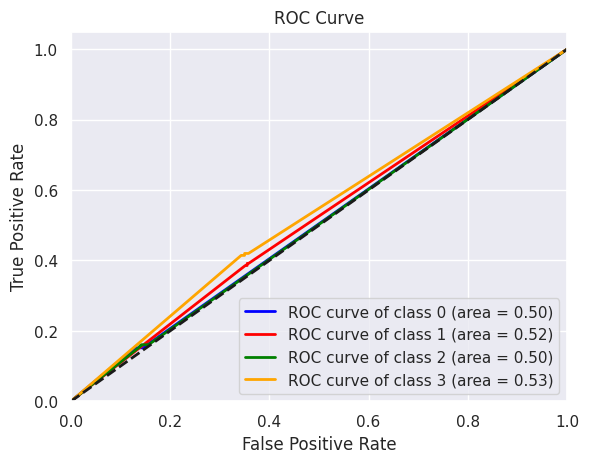

ROC AUC Score (macro): 0.5144843153034528
ROC AUC Score (micro): 0.5144843153034528


In [52]:
# istanziazione del modello Gaussian Naive Bayes
model_MNB3 = MultinomialNB()

# calcolo roc_auc_score e plot
evaluate_roc_auc(model_MNB3, X, y)

In [57]:
# proviamo i principali k fold
classifier_MNB = [MultinomialNB]

evaluate_classifiers(values, classifier_MNB, X, y)

Classifier: <class 'sklearn.naive_bayes.MultinomialNB'>
CV: 5
Mean Accuracy: 0.26281588447653437
Scores: [0.28880866 0.27797834 0.23465704 0.24187726 0.27075812]
----------
CV: 10
Mean Accuracy: 0.277202585757481
Scores: [0.3381295  0.27338129 0.30935252 0.27338129 0.26618705 0.26811594
 0.25362319 0.25362319 0.28985507 0.24637681]
----------
CV: 15
Mean Accuracy: 0.26486676016830296
Scores: [0.37634409 0.22580645 0.32258065 0.27956989 0.27956989 0.22826087
 0.29347826 0.18478261 0.25       0.25       0.23913043 0.18478261
 0.2826087  0.25       0.32608696]
----------
CV: 20
Mean Accuracy: 0.26480331262939966
Scores: [0.34285714 0.32857143 0.22857143 0.34285714 0.32857143 0.27536232
 0.26086957 0.2173913  0.33333333 0.15942029 0.1884058  0.30434783
 0.27536232 0.20289855 0.23188406 0.20289855 0.30434783 0.17391304
 0.28985507 0.30434783]
----------


Classifier: <class 'sklearn.naive_bayes.MultinomialNB'>
CV: 2
Mean Accuracy: 0.24403510747441384
Scores: [0.25541126 0.23265896]
----------
CV: 3
Mean Accuracy: 0.2541498029567444
Scores: [0.25757576 0.25324675 0.2516269 ]
----------
CV: 4
Mean Accuracy: 0.2570484416384868
Scores: [0.24495677 0.28034682 0.24277457 0.26011561]
----------
CV: 5
Mean Accuracy: 0.25703971119133573
Scores: [0.23104693 0.27797834 0.24909747 0.26353791 0.26353791]
----------
CV: 6
Mean Accuracy: 0.2606656628395759
Scores: [0.25108225 0.25974026 0.24242424 0.24242424 0.28571429 0.2826087 ]
----------
CV: 7
Mean Accuracy: 0.2628386841584811
Scores: [0.24747475 0.26262626 0.27777778 0.21212121 0.27272727 0.27272727
 0.29441624]
----------
CV: 8
Mean Accuracy: 0.2563284831572653
Scores: [0.24137931 0.24277457 0.26011561 0.23699422 0.24277457 0.24855491
 0.28323699 0.29479769]
----------
CV: 9
Mean Accuracy: 0.2584811702458761
Scores: [0.25324675 0.26623377 0.27922078 0.28571429 0.21428571 0.27272727
 0.25324675 0

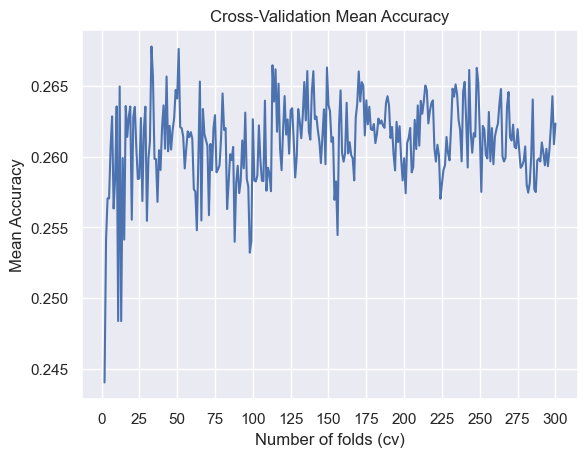

In [ ]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,301) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_MNB, X, y, 25)

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 2
Mean Accuracy: 0.2469357071958228
Scores: [0.24098124 0.25289017]
----------
CV: 3
Mean Accuracy: 0.23468023901863377
Scores: [0.2034632  0.23376623 0.26681128]
----------
CV: 4
Mean Accuracy: 0.23902025620096282
Scores: [0.19596542 0.23988439 0.23699422 0.28323699]
----------
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.18411552 0.24187726 0.24548736 0.25270758 0.26714801]
----------
CV: 6
Mean Accuracy: 0.24117886943973899
Scores: [0.19480519 0.19480519 0.23809524 0.22510823 0.32034632 0.27391304]
----------
CV: 7
Mean Accuracy: 0.23538869477955773
Scores: [0.20707071 0.21212121 0.24242424 0.22727273 0.22727273 0.28282828
 0.24873096]
----------
CV: 8
Mean Accuracy: 0.2419108364892698
Scores: [0.1954023  0.21965318 0.24855491 0.23121387 0.24855491 0.27745665
 0.28901734 0.22543353]
----------
CV: 9
Mean Accuracy: 0.23395486140584185
Scores: [0.2012987  0.19480519 0.20779221 0.23376623 0.24675325 0.18831169
 0.32467532 

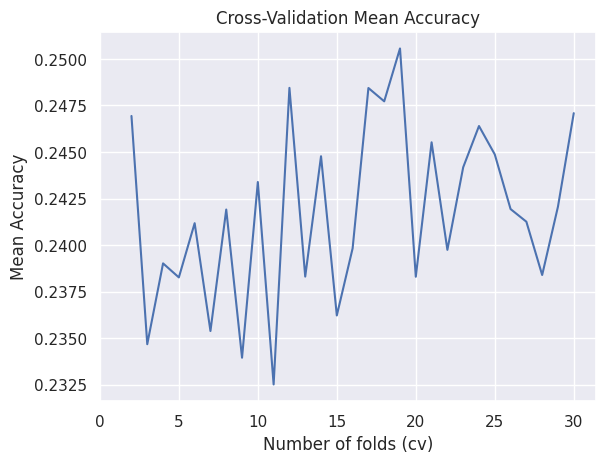

In [ ]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation lavorando sul dataset ridotto con pca
list_cv = range(2,101) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_model, X_pca, y_pca, 5)

Conclusioni sugli esperimenti condotti anche in questo caso non abbiamo ottenuti i risultati che volevamo, inoltre il MultinomialNB sembra comportarsi quasi identicamente a come si è comportato il GaussianNB quindi le loro performance sull'accurancy sono pressapoco identiche.   

## Bernoulli Naive Bayes e Complement Naive Bayes
Andiamo ad addestrare gli ultime due modelli basati sul framework Bayesiano

In [58]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB

In [59]:
# istanziazione del modello Bernoulli Naive Bayes
model_Ber = BernoulliNB()

# usiamo la cross-val
scores_Ber = cross_val_score(model_Ber, X, y, cv=10)
mean_accurancy_Ber = scores_Ber.mean()
print("Accurancy su ogni ciclo della cross-validation: \n", scores_Ber)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_Ber)

Accurancy su ogni ciclo della cross-validation: 
 [0.25899281 0.25899281 0.26618705 0.26618705 0.25899281 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957]
Accurancy mediata su i 10 fold fatti: 0.2613700344072568


In [62]:
# istanziazione del modello Gaussian Naive Bayes
model_BNB2 = BernoulliNB()

# effettuiamo la valutazione completa
full_evaluate_multiclass(model_BNB2, X, y)

Accuracy: 0.2613700344072568
Precision: 0.06831523934887722
Recall: 0.26137184115523465
F1-score: 0.10831895420514591
Precision (Macro): 0.06534296028880866
Precision (Micro): 0.26137184115523465
Recall (Macro): 0.25
Recall (Micro): 0.26137184115523465
F1-score (Macro): 0.10360618202633086
F1-score (Micro): 0.26137184115523465
F2-score (Micro): 0.26137184115523465
F2-score (Macro): 0.15972467349099895
F2-score (Weighted): 0.16699012795304438
Confusion matrix:
 [[  0   0   0 336]
 [  0   0   0 332]
 [  0   0   0 355]
 [  0   0   0 362]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Qui sembrano esserci problemi molto probabilmente dovuti alla binarizzazione forzata che effettua questo modello, il che lo rende inappropriato per il task indipendentemente dagli esperimenti condotti.

In [63]:
# istanziazione del modello Compleement Naive Byes
model_CNB = ComplementNB()

# usiamo la cross-val
scores_CNB = cross_val_score(model_CNB, X, y, cv=10)
mean_accurancy_CNB = scores_CNB.mean()
print("Accurancy su ogni ciclo della cross-validation: \n", scores_CNB)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_CNB)

Accurancy su ogni ciclo della cross-validation: 
 [0.33093525 0.27338129 0.30935252 0.28057554 0.26618705 0.26086957
 0.23188406 0.25362319 0.27536232 0.24637681]
Accurancy mediata su i 10 fold fatti: 0.27285475967052447


In [66]:
# istanziazione del modello Gaussian Naive Bayes
model_CNB2 = ComplementNB()

# effettuiamo la valutazione completa
full_evaluate_multiclass(model_CNB2, X, y)

Accuracy: 0.27285475967052447
Precision: 0.2705397085329349
Recall: 0.27292418772563176
F1-score: 0.25561917583475885
Precision (Macro): 0.2700510436443861
Precision (Micro): 0.27292418772563176
Recall (Macro): 0.27203454256346393
Recall (Micro): 0.27292418772563176
F1-score (Macro): 0.254888819973221
F1-score (Micro): 0.27292418772563176
F2-score (Micro): 0.27292418772563176
F2-score (Macro): 0.26178764932293186
F2-score (Weighted): 0.2626174545686728
Confusion matrix:
 [[ 44 122  49 121]
 [ 47 127  45 113]
 [ 41 126  52 136]
 [ 36 123  48 155]]


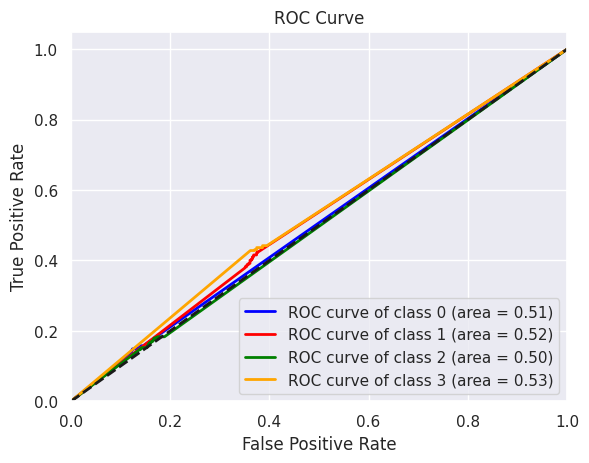

ROC AUC Score (macro): 0.5134427935637943
ROC AUC Score (micro): 0.5134427935637943


In [67]:
# istanziazione del modello Gaussian Naive Bayes
model_CNB3 = ComplementNB()

# calcolo roc_auc_score e plot
evaluate_roc_auc(model_CNB3, X, y)

In [ ]:
# esperimento condotto dalla disperazione del momento
Bayes_model = [BernoulliNB, ComplementNB]

evaluate_classifiers(values, Bayes_model, X, y)

Classifier: <class 'sklearn.naive_bayes.BernoulliNB'>
CV: 5
Mean Accuracy: 0.26137184115523465
Scores: [0.2599278  0.2599278  0.26353791 0.26353791 0.2599278 ]
----------
CV: 10
Mean Accuracy: 0.2613700344072568
Scores: [0.25899281 0.25899281 0.26618705 0.26618705 0.25899281 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957]
----------
CV: 15
Mean Accuracy: 0.26136824061087727
Scores: [0.25806452 0.25806452 0.2688172  0.2688172  0.25806452 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957
 0.26086957 0.26086957 0.26086957]
----------
CV: 20
Mean Accuracy: 0.26138716356107666
Scores: [0.25714286 0.25714286 0.25714286 0.25714286 0.25714286 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957
 0.27536232 0.27536232 0.26086957 0.26086957 0.26086957 0.26086957
 0.26086957 0.26086957]
----------
Classifier: <class 'sklearn.naive_bayes.ComplementNB'>
CV: 5
Mean Accuracy: 0.25776173285198556
Scores: [0.23826715 0.27436823 0.24187726 0.

Output streaming troncato alle ultime 5000 righe.
 0.22222222 0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0

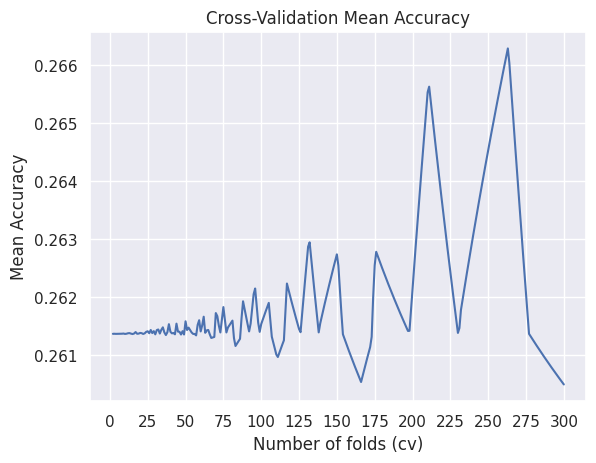

Output streaming troncato alle ultime 5000 righe.
 0.55555556 0.25       0.25       0.25       0.25       0.25
 0.5        0.375      0.375      0.125      0.25       0.25
 0.5        0.         0.125      0.25       0.5        0.
 0.375      0.25       0.375      0.25       0.125      0.125
 0.375      0.125      0.125      0.25       0.25       0.25
 0.         0.         0.25       0.375      0.125      0.
 0.25       0.25       0.25       0.25       0.5        0.125
 0.125      0.125      0.125      0.5        0.25       0.25
 0.375      0.25       0.375      0.25       0.125      0.5
 0.25       0.25       0.25       0.25       0.         0.25
 0.25       0.625      0.125      0.25       0.         0.375
 0.25       0.25       0.375      0.25       0.25       0.5
 0.         0.25       0.125      0.25       0.         0.375
 0.25       0.125      0.25       0.125      0.375      0.375
 0.375      0.125      0.375      0.375      0.5        0.25
 0.125      0.375      0.5        0.

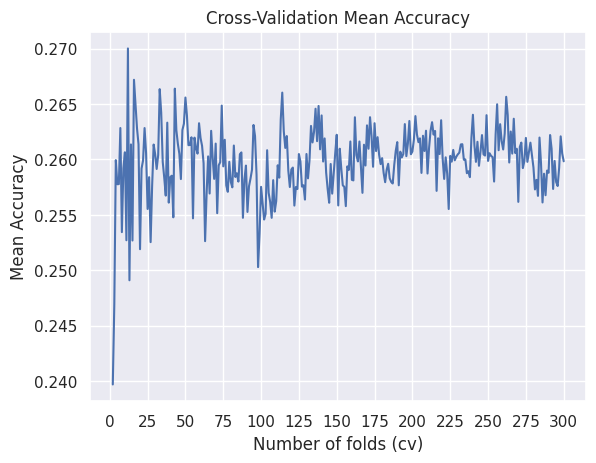

In [ ]:
B_list = range(2,301) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(B_list, Bayes_model, X, y, 25)

Conclusione dello studio i classificatori Bayesiani BernoulliNB e ComplementNB si comportano decisamente meglio dei GaussinNB e MultinominalNB inoltre sembrano avere una stabilità maggiore e oscillano entrambi in un range estremamente vicino alla moda che vogliamo cercare di superare, per quanto riguarda il miglio k però si differenziano il ComplementNB ottiene i migliori risultati con 17 <= K <= 25, mentre il BernoulliNB ottieme le megliori performance tra 200 <= K <= 275 e questo sembra sospettoso bisognerà fare alcuni affrofondimenti su come lavora il classificatore Bayesiano di Bernoulli.